# Practicing loss functions and regression metrics

Below you will practice looking at loss functions and look at regression metrics related to these loss functions.

## 1. Load packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

import matplotlib as mpl
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

%matplotlib inline

## 2. Plotting functions

Here are the functions from the presentation to make visualizing your regressions easier:

In [2]:
def plot_regression(x, y, model):
    plt.figure(figsize=(10,8))
    axes = plt.gca()
    
    intercept = model.params[0]
    slope = model.params[1]

    for x_, y_ in zip(x, y):    
        plt.plot((x_, x_), (y_, x_*slope + intercept),
                 'k-', ls='dashed', lw=1)
        
    plt.scatter(x, y, s=70, c='steelblue')
    
    x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
    
    regline_x = x_points
    regline_y = x_points*slope + intercept

    plt.plot(regline_x, regline_y, c='darkred', lw=3.5)

    plt.show()
    
    
def plot_leastsq_loss(model):
    plt.figure(figsize=(10,8))
    
    resids = model.resid
    
    resid_lim = np.max([abs(np.min(resids)), abs(np.max(resids))]) + 1
    
    resid_points = np.linspace(-1*resid_lim, resid_lim, 200)
    
    for r in resids:
        plt.plot((r, r), (0, r**2), 'k-', ls='dashed', lw=2)
        
    plt.plot(resid_points, resid_points**2, c='gold', alpha=0.7)
    

def plot_residuals_ladloss(model):
    
    resids = model.resid
    
    resid_lim = np.max([abs(np.min(resids)), abs(np.max(resids))]) + 1
    
    resid_points = np.linspace(-1*resid_lim, resid_lim, 200)
    
    plt.figure(figsize=(10,8))
    
    for r in resids:
        
        plt.plot((r, r), (0, abs(r)), 'k-', ls='dashed', lw=1)
        
    plt.plot(resid_points, np.abs(resid_points), c='gold', alpha=0.7)
    


## 3. Load in the data from project 3

Load your data from project 3

In [3]:
sales = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')

In [4]:
sales_sample = sales.sample(frac=0.1)

In [5]:
sales_sample.shape

(27096, 18)

In [6]:
sales_sample.to_csv('Iowa_Liquor_sales_small.csv', index=False)

## 4. Choose a continuous response variable and predictor variable from the dataset

If you choose columns with dollar amounts, you will need to remove the dollar signs!

In [11]:
print sales.columns
print sales.dtypes

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')
Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object


In [12]:
cost = sales['State Bottle Cost'].values
cost_2 = sales['State Bottle Retail'].values
sold = sales['Bottles Sold'].values

In [13]:
cost = np.array([float(x.replace('$','')) for x in cost])
cost_2 = np.array([float(x.replace('$','')) for x in cost_2])

## 5. Choose a small subset of the predictor and response variables you chose

You can use the ```np.random.choice()``` function to get a random sample of indices. Look up how to use it!

In [30]:
indices_sample = np.random.choice(range(0,len(cost)), size=50, replace=False)

cost_sample = cost[indices_sample]
cost_2_sample = cost_2[indices_sample]
sold_sample = sold[indices_sample]

## 6. Build a least squares regression model predicting your response from your predictors

Remember to use your sample so you can plot this later!

I did not provide the code to create the regression. Either look it up in the statsmodels documentation or refer to the slides so you can practice doing this yourself.

In [38]:
X = sm.add_constant(cost_sample)
#print X

In [39]:
leastsq_reg = sm.OLS(sold_sample, sm.add_constant(cost_sample)).fit()
print leastsq_reg.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8491
Date:                Thu, 23 Jun 2016   Prob (F-statistic):              0.361
Time:                        16:40:35   Log-Likelihood:                -175.56
No. Observations:                  50   AIC:                             355.1
Df Residuals:                      48   BIC:                             358.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.4518      2.690      3.514      0.0

In [21]:
#How to access parts of your OLS regression
print 'coefficients:', leastsq_reg.params 
print 'rsquared: ', leastsq_reg.rsquared
print 'standard error: ', leastsq_reg.bse 
#print 'Predicted values: ', res.predict() #prints predicted values

coefficients: [ 17.11513651  -0.70802257]
rsquared:  0.0471495737177
standard error:  [ 4.69520704  0.45940949]


In [32]:
df_2 = pd.DataFrame({'bottle_cost': cost_sample, 'bottle_retail': cost_2_sample})
costs = sm.add_constant(df_2)
print costs.shape
print sold_sample.shape

(50, 3)
(50,)


In [36]:
est = sm.OLS(sold_sample, costs).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.4640
Date:                Thu, 23 Jun 2016   Prob (F-statistic):              0.632
Time:                        15:51:04   Log-Likelihood:                -175.50
No. Observations:                  50   AIC:                             357.0
Df Residuals:                      47   BIC:                             362.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             9.5752      2.745      3.489      0.001         4.054    15.097
bottle_cost      15.4627     51.031      0.303      0.763       -87.199   118.125
bottle_retail   -10.4912     34.033     -0.308      0.759       -78.956    57.974
==============================================================================
Omnibus:                       49.590   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.901
Skew:                           2.589   Prob(JB):                     9.81e-52
Kurtosis:                      12.270   Cond. No.                         866.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# import formula api as alias smf
# import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
# est_2 = smf.ols(formula='Sales ~ TV + Radio', data=df_adv).fit()

## 7. Plot the least squares regression

You can use the ```plot_regression(x, y, model)``` function provided.

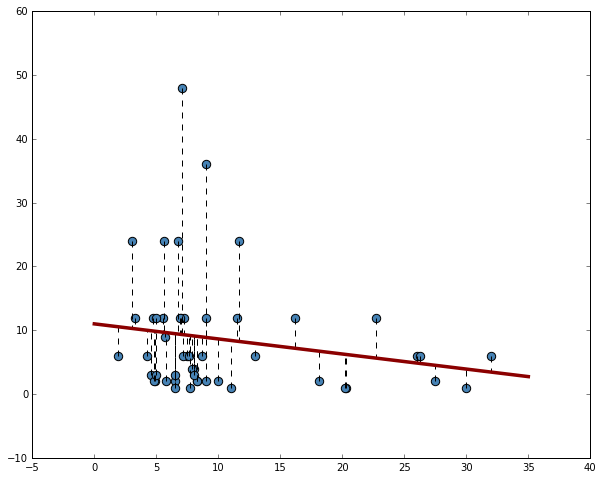

In [13]:
plot_regression(cost_sample, sold_sample, leastsq_reg)

## 8. Build a least absolute deviation quantreg model on the same sample

In [14]:
lad_reg = QuantReg(sold_sample, sm.add_constant(cost_sample)).fit(q=0.5)
print lad_reg.summary()

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:           -2.661e-08
Model:                       QuantReg   Bandwidth:                       10.72
Method:                 Least Squares   Sparsity:                        19.11
Date:                Wed, 22 Jun 2016   No. Observations:                   50
Time:                        23:12:46   Df Residuals:                       48
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.0000      2.330      2.575      0.013         1.315    10.685
x1         -4.259e-07      0.182  -2.34e-06      1.000        -0.366     0.366


## 9. Plot the LAD regression

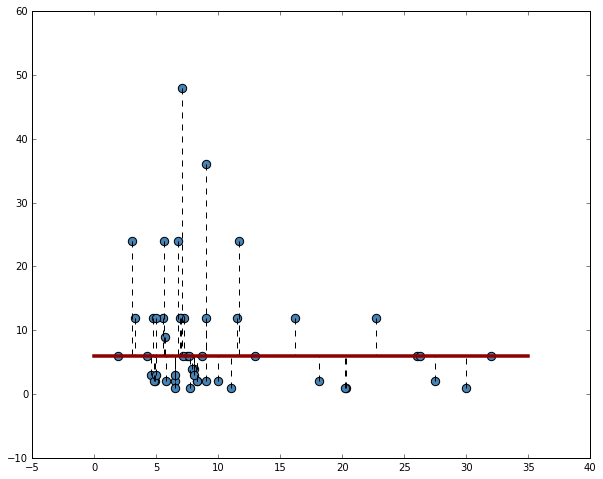

In [15]:
plot_regression(cost_sample, sold_sample, lad_reg)

## 10. Calculate the RMSE and the MAE between you response and predicted response

**RMSE** is the **root mean squared error**. It is a metric for the performance of your regression related to the least squared loss. 

$$\text{RMSE} = \sqrt{\frac{\sum_{i}{\left(\hat{y}_i - y_i \right)^2}}{n}}$$

https://en.wikipedia.org/wiki/Root-mean-square_deviation

**MAE** is the **mean absolute error**. It is a metric for regression performace when the loss function is the least absolute deviation.

$$\text{MAE} = \frac{\sum_{i}{|\hat{y}_i - y_i |}}{n}$$

https://en.wikipedia.org/wiki/Average_absolute_deviation

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
leastsq_predictions = leastsq_reg.predict()
lad_predictions = lad_reg.predict()

In [18]:
print np.sqrt(mean_squared_error(sold_sample, leastsq_predictions))

9.21162178081


In [19]:
print mean_absolute_error(sold_sample, lad_predictions)

5.98000015915


## 11. [BONUS] What would be the loss function to find the _mode_ and why?

Remember that the least squares loss minimizes:

### $$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$

And the least absolute deviation loss minimizes:

### $$y = \sum_{i}{|\hat{y}_i - y_i |^1}$$

**Do you see a pattern here?**


The loss function to find the mode of a response variable with predictors minimizes the sum:

$$\frac{\sum_{i}{|\hat{y}_i - y_i |^{0}}}{n}$$

This is because $0^0=0$ and $x^0=1$ otherwise.

**The minimum is where the predicted responses are equal to the most common response**. This is because there will be the most 0 values where the predicted response matches the most true responses. Any other predicted response becomes 1!

## 12. [BONUS] Create a quantile regression with q = 0.25 and plot it. What exactly is this regression predicting?

In [20]:
q25_reg = QuantReg(sold_sample, sm.add_constant(cost_sample)).fit(q=0.25)
print q25_reg.summary()

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.004612
Model:                       QuantReg   Bandwidth:                       9.771
Method:                 Least Squares   Sparsity:                        21.37
Date:                Wed, 22 Jun 2016   No. Observations:                   50
Time:                        23:13:41   Df Residuals:                       48
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.4290      2.223      1.093      0.280        -2.041     6.899
x1            -0.0477      0.178     -0.267      0.790        -0.406     0.311


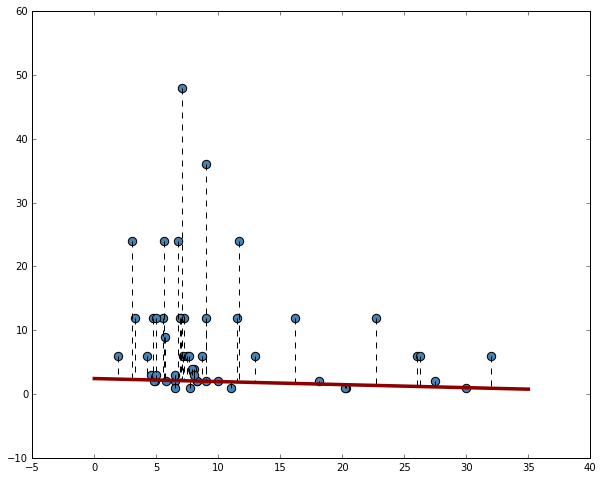

In [21]:
plot_regression(cost_sample, sold_sample, q25_reg)

When q=0.25, the quantile regression is **predicting the 25th percentile of the response variable given the predictors**.